In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def in_place(N=4, goal=(0,0), r=-1, gamma=1, theta=0.01):
    Vs = np.zeros((N, N))
    diff = 1
    t = 0
    while diff > theta:
        for i in range(0,N):
            for j in range(0,N):
                pos = (i, j)
                if pos==goal:
                    continue
                else:
                    up = (i-1, j)
                    down = (i+1, j)
                    left = (i, j-1)
                    right = (i, j+1)
                    v = Vs[pos]
                    val = []
                    for new_pos in [up, down, left, right]:
                        x = new_pos[0]
                        y = new_pos[1]
                        if x < 0 or y < 0:
                            val.append(Vs[pos])
                        elif x > N-1 or y > N-1:
                            val.append(Vs[pos])
                        else:
                            val.append(Vs[new_pos])
                    Vs[pos] = (np.array(val)*gamma-1).mean()
                    diff = np.amin(np.array([diff, np.absolute(v-Vs[pos])]))
        t += 1
    return t, Vs

In [3]:
def in_place2(N=4, goal=(0,0), r=-1, gamma=1, theta=0.01):
    Vs = np.zeros((N, N))
    diff = 1
    t = 0
    while diff > theta:
        V_new = np.zeros((N, N))
        for i in range(0,N):
            for j in range(0,N):
                pos = (i, j)
                if pos==goal:
                    continue
                else:
                    up = (i-1, j)
                    down = (i+1, j)
                    left = (i, j-1)
                    right = (i, j+1)
                    val = []
                    for new_pos in [up, down, left, right]:
                        x = new_pos[0]
                        y = new_pos[1]
                        if x < 0 or y < 0:
                            val.append(Vs[pos])
                        elif x > N-1 or y > N-1:
                            val.append(Vs[pos])
                        else:
                            val.append(Vs[new_pos])
                    V_new[pos] = (np.array(val)*gamma-1).mean()
        diff = np.amin(np.array([diff, np.amax(np.absolute(V_new-Vs))]))
        Vs = np.copy(V_new)
        t += 1
    return t, Vs

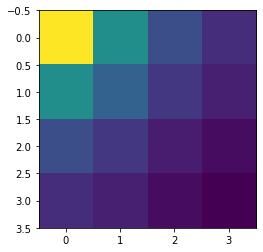

In [4]:
t_in_place, V_in_place = in_place()
plt.figure()
plt.title("Value Function Heatmap")
plt.imshow(V_in_place)

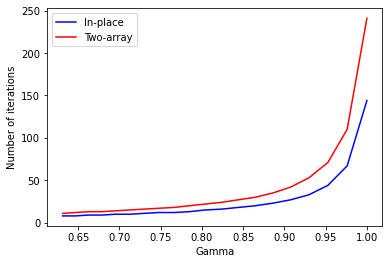

In [6]:
gam = np.logspace(-0.2, 0, num=20)
t_vec = []
t2_vec = []
for g in gam:
    t, V = in_place(gamma=g)
    t2, V2 = in_place2(gamma=g)
    t_vec.append(t)
    t2_vec.append(t2)

plt.figure()
plt.plot(gam, t_vec, 'b', label='In-place')
plt.plot(gam, t2_vec, 'r', label='Two-array')
plt.title("Convergence Plot")
plt.xlabel("Gamma")
plt.ylabel("Number of iterations")
plt.legend();